In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import graphviz

# 1 Теория

Зафиксируем произвольный лист обученного нами дерева. Пусть в нем находятся элементы $Y = \lbrace y_1, y_2, \dots y_n \rbrace$ Элементы Y не обязательно различные 

К нам приходит произвольный элемент $(x, y_k)$, где $y_k \in Y$

У нас есть 2 стратегии: возвращать среднее или один из элементов тренировочной выборки попавшей в лист равной вероятностью.

Найдем матожидание $\xi \sim $(действуем по второй стратегии). $E\xi = \sum\limits_{i = 1}^{n} \frac{1}{n} y_i = \overline{Y}$

$a_1(x)$ - среднее
$a_2(x)$ - вероятностный



$E(a_1(x) - y_k)^2 = Ea_1(x)^2 - 2Ea_1(x)y_k + Ey_k^2 = E\overline{Y}^2 - 2E\overline{Y}y_k + Ey_k^2 = \overline{Y}^2 - 2\overline{Y}y_k + y_k^2 = (\overline{Y} - y_k)^2$, Так как все это известные нам величины

Для посчета матожидания для второго алгоритма возьмем и посчитаем $E\xi^2 = \sum\limits_{i = 1}^{n} \frac{1}{n} y_i^2 = \overline{Y^2}$

$E(a_2(x) - y_k)^2 = Ea_2(x)^2 - 2Ea_2(x)y_k + Ey_k^2 = \overline{Y^2} - 2y_k\overline{Y} + y_k^2$. Супер, а теперь найдем разницу этих матожиданий, и узнаем, какой алгоритм все же лучше:

$$\overline{Y}^2 - 2\overline{Y}y_k + y_k^2 - \overline{Y^2} + 2y_k\overline{Y} - y_k^2 = \overline{Y}^2 - \overline{Y^2} < 0$$ то есть матож ошибки у первого алгоритма меньше $\Rightarrow$ он лучше

# 2 Теория

Это работает не всегда хорошо, потому что редко признаки являются линейно зависимыми(сильно кореллируемыми)


Так как нам нельзя менять критерий разбиения(MSE), посмотрим, что мы делаем придя в очередной узел: хотим подобрать такие два разбиения(признак + граница), что взвешенная сумма ошибок минимальна, отвечаем мы линейной регрессией. То есть разбив на два множества мы в каждом строим наилучшую прямую через МНК. Пусть нам в очередной узел попало множество точек, образующее 2 параллельные прямые(не параллельны осям координат посмотрим пока в двумерном). При старом критерии мы выберем один из признаков и границу по нему(то есть просто проведем линию, параллельной одной из осей координат, которая разделит выборку). Но тут при линейной регрессии будет очень высокая ошибка. Чтобы исправить это, мы можем ввести, например, новый признак: сумму двух с какими-то коэффициентами. Тогда выбрав новый признак в кач-ве основы для разбиения и границу 'с' получим: ${f_2 + \alpha f_1 \leq c}$ - задает уравнение прямой. То есть нам нужно уметь просто строить разделяющую прямую. Вот, например так можно устроить разбиение.



Ну а еслим мы можем менять критерий, то лучше тогда считать не MSE, а корелляцию Спирмена, она устойчива к выбросам и с помощью нее можно узнать меру линейной зависимости набора точек




Так же есть проблема, например, с тем, что нас могут попросить предсказать что-то для точки, которая выходить за область, про которую мы знаем что-то и мы вернем ответ - среднее для ближайшей известной нам области, хотя эта точка может быть далеко на бесконечности.  Ну а если она еще и лежит на одной прямой с точками в ближайшей известной области, то линейная регрессия даст прекрасный, результат, не то что среднее(

# 3 Теория

$H(S) = \frac{1}{2} ln((2\pi e)^n \cdot |\Sigma|)$ Нам нужно доказать, что энтропия многомерного нормального распределения равна $H(S)$

Энтропия равна $$h(p) = -\int\limits_{\mathcal{R}^n}p(\vec{x})\cdot ln(p(\vec{x}))d\vec{x}$$ Подставим в данное выражение плотность многомерного нормального распредедления(dim = n)
$$h(p) = -\int\limits_{\mathcal{R}^n} (\frac{1}{2\pi})^{\frac{n}{2}} \cdot \frac{1}{\sqrt{|\Sigma|}} 
e^{-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)}   \cdot (-\frac{1}{2} \cdot ln((2\pi)^n \cdot |\Sigma|) -\frac{1}{2} \cdot (x - \mu)^T\Sigma^{-1}(x - \mu)) d\vec{x}$$


$-\frac{1}{2} \cdot ln((2\pi)^n \cdot |\Sigma|)$ - не зависит от х, то есть константа, а она домножается на плотность многомерного нормального, инеграл которой по $\mathcal{R}^n$ равен единицы. То есть первое слагаемое будет попросту равно $\frac{1}{2} \cdot ln((2\pi)^n \cdot |\Sigma|) $

Осталось посчитать
$$h(p) = -\int\limits_{\mathcal{R}^n} (\frac{1}{2\pi})^{\frac{n}{2}} \cdot \frac{1}{\sqrt{|\Sigma|}} 
e^{-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)}   \cdot (-\frac{1}{2} \cdot (x - \mu)^T\Sigma^{-1}(x - \mu)) d\vec{x}$$
А это просто матожидание $-\frac{1}{2} \cdot (x - \mu)^T\Sigma^{-1}(x - \mu)$ по мере(многомерного нормального)


Обозначим за $\sigma^{-1}_{i,j} - $ элементы матрицы $\Sigma^{-1}$
Распишем: $E(x - \mu)^T\Sigma^{-1}(x - \mu) =$/ Возьмем просто найдем значение квадратичной формы /$= E\sum\limits_{j = 1}^{n}\sum\limits_{i = 1}^{n} \sigma^{-1}_{i,j}(x_i - \mu_i)(x_i - \mu_j) = \sum\limits_{j = 1}^{n}\sum\limits_{i = 1}^{n} \sigma^{-1}_{i,j}E(x_i - \mu_i)(x_i - \mu_j) =$/ так как Сигма - матрица ковариаций /$= \sum\limits_{j = 1}^{n}\sum\limits_{i = 1}^{n} \sigma^{-1}_{i,j}\sigma_{i,j} =$ / Воспользуемся симметричностью матрицы ковариаций / = $\sum\limits_{j = 1}^{n}\sum\limits_{i = 1}^{n} \sigma^{-1}_{i,j}\sigma_{j,i} = tr(\Sigma^{-1}\cdot \Sigma) = n$ То есть мы получили просто след единичной матрицы, а он равен ее размерности, которая в нашем случае равна n


Итого, полученная нами энтропия равна: $$\frac{1}{2} \cdot ln((2\pi)^n \cdot |\Sigma| + \frac{1}{2}\cdot n =
  \frac{1}{2}(ln((2\pi)^n \cdot |\Sigma| + n) = \frac{1}{2}(ln((2\pi)^n \cdot |\Sigma| \cdot e^n)$$
$ЧТД \blacksquare$

In [2]:
data = pd.read_csv('./german.data-numeric.txt', delim_whitespace=True, header=None)

In [3]:
data.head()

0   1   2   3   4   5   6   7   8   9  ...  15  16  17  18  19  20  21  22  \
0   1   6   4  12   5   5   3   4   1  67 ...   0   0   1   0   0   1   0   0   
1   2  48   2  60   1   3   2   2   1  22 ...   0   0   1   0   0   1   0   0   
2   4  12   4  21   1   4   3   3   1  49 ...   0   0   1   0   0   1   0   1   
3   1  42   2  79   1   4   3   4   2  45 ...   0   0   0   0   0   0   0   0   
4   1  24   3  49   1   3   3   4   4  53 ...   1   0   1   0   0   0   0   0   

   23  24  
0   1   1  
1   1   2  
2   0   1  
3   1   1  
4   1   2  

[5 rows x 25 columns]

24 - target

In [4]:
data.shape


(1000, 25)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus 
from IPython.display import Image

In [6]:
algo = DecisionTreeClassifier()
algo.fit(data.drop([24], axis=1), data[24])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
dot_data = tree.export_graphviz(algo, out_file="small_tree.out", 
                         feature_names=data.columns[:-1],  
                         class_names=['Good', 'Bad'],  
                         filled=True, rounded=True,  
                         special_characters=True)

In [8]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
img = Image(graph.create_png(), retina=True)

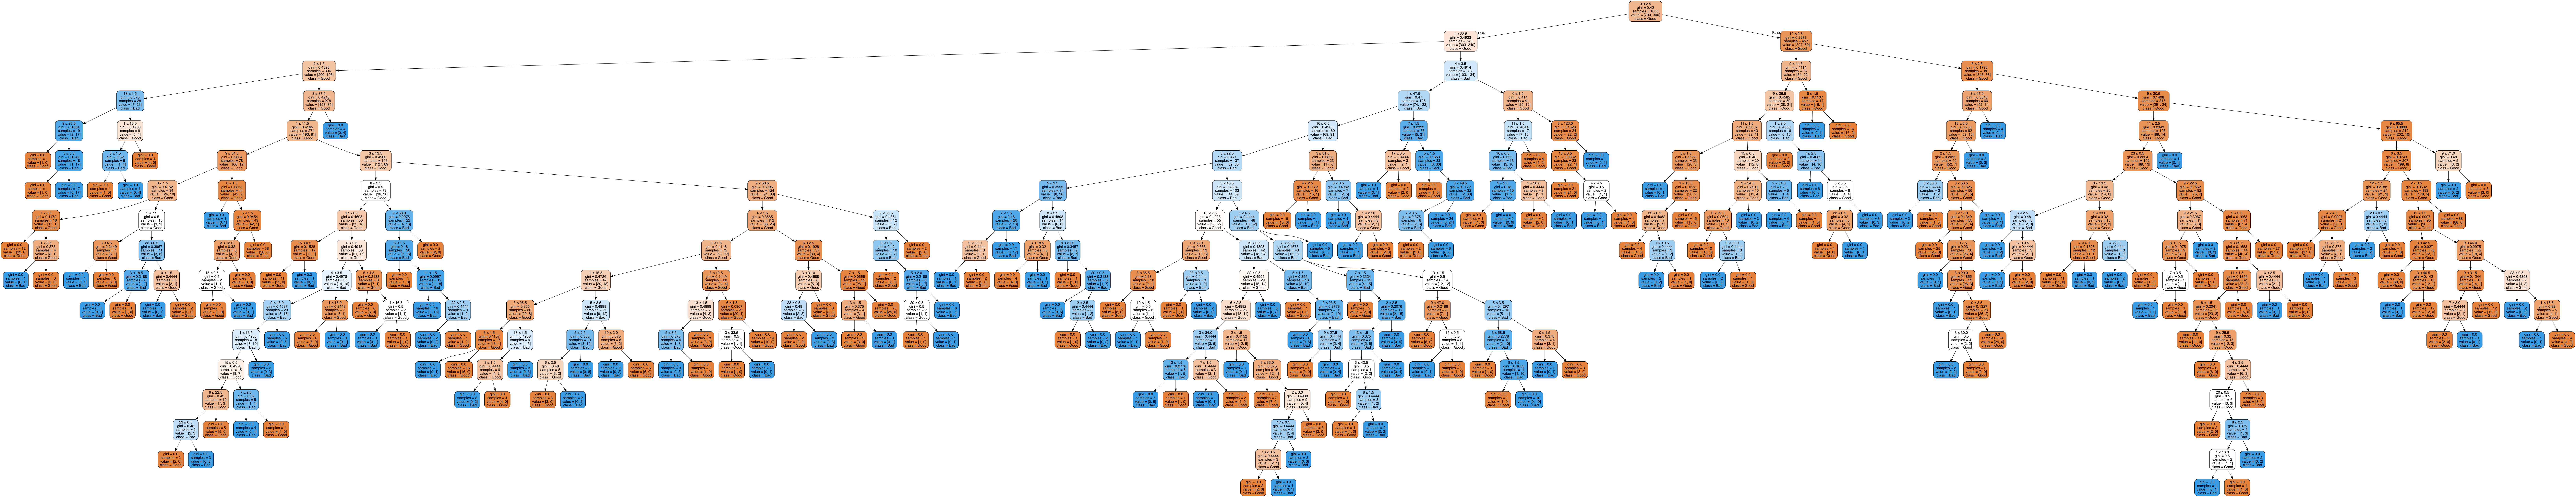

In [9]:
img

In [10]:
# with open('graph_german.png', 'wb') as f:
#     f.write(img.data)

Не вышло нормально распарсить признаки((((

In [19]:
from tqdm import tqdm
import sklearn
from sklearn.cross_validation import cross_val_score

In [20]:
errors = []
for depth in tqdm(range(1, 23)):
    errors.append(cross_val_score(DecisionTreeClassifier(max_depth=depth), data.drop([24], axis=1), data[24]).mean())

100%|██████████| 22/22 [00:00<00:00, 39.25it/s]


In [22]:
plt.figure(figsize=(15,7))
plt.plot(range(1,23), errors, color='magenta', label='error rate for DecisionTree')
plt.xlabel('max_depth')
plt.xlim(0, 23)
plt.ylabel('MSE')
plt.legend()
plt.show()

# 3 Реализация решающего дерева (опциональная часть)

In [23]:
from sklearn import datasets

In [24]:
boston = datasets.load_boston()

In [25]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [26]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [30]:
from sklearn.cross_validation import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(boston.data), pd.DataFrame(boston.target), random_state=42)

In [33]:
y_train.head()

0
182  37.9
155  15.6
280  45.4
126  15.7
329  22.6

In [34]:
X_train.shape

(379, 13)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
from copy import deepcopy



In [60]:
class DecisionTree:
    '''A decision tree regressor
       Has a binary tree (array) structure
       node with the index i has children as 2 * i + 1 and 2 * i + 2
    
    '''
    def get_params(self, deep=True):
        return deepcopy(self.max_depth) if  deep else self.max_depth
    
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        
        # Check parameters
        self.max_depth = ((2 ** 31) - 1 if self.max_depth is None
                     else self.max_depth)
     
        self.tree = [-1] * (2 ** max_depth - 1)
        self.samples = [None] * (2 ** max_depth - 1)
        self.targets = [None] * (2 ** max_depth - 1)
    
    def fit(self, X, y):
        ''' Criterion is 'mse' by default
            Will become a parameter in next versions
        '''
        self.samples[0] = X
        self.targets[0] = y
        
        for cur_node in tqdm(range(len(self.tree))):
            if self.tree[cur_node] is None or self.samples[cur_node] is None:
                self.tree[cur_node] = None
                continue
                
            if cur_node * 2 + 1 >= len(self.tree):
                self.tree[cur_node] = None
                continue
            
            left_son = 2 * cur_node + 1
            right_son = 2 * cur_node + 2
            
            top_feature = None
            top_threshold = None
            top_information = np.inf
            
            cur_samples = self.samples[cur_node]
            cur_targets = self.targets[cur_node]                
            
            print(cur_node)
            for feature_id  in range(X.shape[1]):
                
                srtd_values = sorted(cur_samples[feature_id]) # Так и не понял, даст ли это какое-то увеличение кач-ва на тренировочной выборке
                for i in range(1, len(cur_samples)):
                    
                    if srtd_values[i] == srtd_values[i - 1]:
                        continue
                    threshold = (srtd_values[i] + srtd_values[i - 1]) / 2.
                    
                    samples_to_left = cur_samples[cur_samples[feature_id] <= threshold]
                    samples_to_right =  cur_samples[~(cur_samples[feature_id] <= threshold)]
                    targets_to_left = cur_targets[cur_targets.index.isin(samples_to_left.index)]
                    targets_to_right = cur_targets[cur_targets.index.isin(samples_to_right.index)]
                    
                    mse_left = 0 if len(samples_to_left) == 0 \
                    else  mean_squared_error(targets_to_left, [targets_to_left.mean()[0]] * len(targets_to_left))
                        
                    mse_right = 0 if len(samples_to_right) == 0 \
                    else mean_squared_error(targets_to_right, [targets_to_right.mean()[0]] * len(targets_to_right))

                    current_information = float(len(samples_to_left)) / len(cur_samples) * mse_left + \
                                          float(len(samples_to_right)) / len(cur_samples) * mse_right

                    if current_information < top_information:
                        top_feature = feature_id
                        top_threshold = threshold
                        top_information = current_information
            
            if mean_squared_error(cur_targets, [cur_targets.mean()[0]] * len(cur_targets)) < top_information:
                self.tree[cur_node] = None # Means that we are in leaf now
                continue
                
            
            self.samples[left_son] = cur_samples[cur_samples[top_feature] <= top_threshold]
            self.samples[right_son] = cur_samples[~(cur_samples[top_feature] <= top_threshold)]
            self.targets[left_son] = cur_targets[cur_targets.index.isin(self.samples[left_son].index)]
            self.targets[right_son] = cur_targets[cur_targets.index.isin(self.samples[right_son].index)]
            
            self.tree[cur_node] = (top_feature, top_threshold, top_information)
            
            print(len(self.samples[left_son]), len(self.samples[right_son]))
            
            if len(self.samples[left_son]) < 2:
                self.tree[left_son] = None
            if len(self.samples[right_son]) < 2:
                self.tree[right_son] = None
            

    def predict(self, X):
        answers = []
        for elem in X.values:
            cur_node = 0
            while self.tree[cur_node] is not None:
                top_feature, top_threshold, _ = self.tree[cur_node]
                
                cur_node = cur_node * 2 + 1 if elem[top_feature] <= top_threshold else cur_node * 2 + 2
            
            answers.append(self.targets[cur_node].mean()[0])
            
        return np.array(answers)

Натреним наше дерево на тренировочной выборке

In [57]:
my_algo = DecisionTree(5)

In [38]:
my_algo.fit(X_train, y_train)

  0%|          | 0/31 [00:00<?, ?it/s]

0
(314, 65)

  3%|▎         | 1/31 [00:06<03:06,  6.22s/it]


1
(187, 127)

  6%|▋         | 2/31 [00:11<02:51,  5.91s/it]


2
(40, 25)

 10%|▉         | 3/31 [00:12<02:06,  4.51s/it]


3
(4, 183)

 13%|█▎        | 4/31 [00:15<01:50,  4.09s/it]


4
(76, 51)

 16%|█▌        | 5/31 [00:17<01:28,  3.42s/it]


5
(38, 2)

 19%|█▉        | 6/31 [00:18<01:05,  2.63s/it]


6
(24, 1)

 23%|██▎       | 7/31 [00:18<00:47,  1.99s/it]


7
(3, 1)
8
(140, 43)

 29%|██▉       | 9/31 [00:22<00:40,  1.86s/it]


9
(10, 66)

 32%|███▏      | 10/31 [00:23<00:34,  1.66s/it]


10
(18, 33)

 35%|███▌      | 11/31 [00:23<00:27,  1.37s/it]


11
(2, 36)

 39%|███▊      | 12/31 [00:24<00:22,  1.19s/it]


12
(1, 1)
13
(11, 13)

100%|██████████| 31/31 [00:25<00:00,  1.23it/s]

Взглянем, как вообще оно выглядит

In [39]:
my_algo.tree

[(5, 6.9409999999999998, 46.543375655267546),
 (12, 14.399999999999999, 22.947518983702434),
 (5, 7.4369999999999994, 39.644913076923075),
 (7, 1.3848500000000001, 16.566260848601736),
 (0, 7.0841399999999997, 11.192049356833492),
 (0, 7.3934249999999997, 21.656348684210517),
 (0, 2.742235, 18.344799999999992),
 (0, 10.109175, 0.0),
 (5, 6.5430000000000001, 8.5263808525316325),
 (6, 73.299999999999997, 7.9786315789473683),
 (12, 19.73, 7.4425856605268379),
 (7, 1.88595, 13.663435672514622),
 (0, 48.612145000000005, 0.0),
 (7, 3.2074499999999997, 11.539865967365962),
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Приступим к сравнению результатов. Сначала посмотрим на качество нашего дерева

In [40]:
results = my_algo.predict(X_test)

In [41]:
mean_absolute_error(y_test, results)

2.8619306022061926

In [42]:
mean_squared_error(y_test, results)

14.730439484828855

А теперь посмотрим, что выдает sklearn.DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
ssd = DecisionTreeRegressor(max_depth=5)
ssd.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [46]:
resiki = ssd.predict(X_test)

In [47]:
mean_absolute_error(y_test, resiki)

2.6266070646223798

In [48]:
mean_squared_error(y_test, resiki)

20.513114107600135